# Introduction
Let's try something more difficult.
Let's build Neural Network from scratch using only pure python and numpy.

---

# Step 1: Define the problem and the data
- We want to build a binary classifier that predicts whether the first feature of the input data is greater than 0.5 or not.
- We'll generate some random data for training and testing. The data will have two features (x1 and x2) and a target variable (y) that's 1 if x1 is greater than 0.5 and 0 otherwise.


# Step 2: Choose the neural network architecture
- We'll use a simple feedforward neural network with one hidden layer.
- The input layer will have 2 neurons (one for each feature).
- The hidden layer will have 10 neurons (this is an arbitrary choice, but 10 is a good sarting point for many problems).
- The output layer will have 1 neuron (since we're doing binary classification).


# Step 3: Initialize the weights and biases
- We'll initialize the weights and biases randomly. The weights will be matrices that connect the neurons between layers, and the biases will be vectors that add a constant value to the output of each neuron.
- The weights and biases will be initialized using the following formulas:
  + Weights: `weights = np.random.rand(input_dim, output_dim)`
  + Biases: `biases = np.zeros((1, output_dim))`


# Step 4: Define the activation functions
- We'll use the sigmoid activation function for both the hidden and output layers. The sigmoid function maps the input to a value between 0 and 1.
- The sigmoid function is defined as: `sigmoid(x) = 1 / (1 + exp(-x))`
- We'll also define the derivative of the sigmoid function, which is used in backpropagation: `sigmoid_derivative(x) = x * (1 - x)`


# Step 5: Implement the forward pass
- The forward pass is the process of passing the input data through the network to get the output.
- Here's the step-by-step process:
  1. Multiply the input data by the weights to get the weighted sum: `hidden_layer = np.dot(inputs, weights1)`
  1. Add the bias to the weighted sum: `hidden_layer = hidden_layer + bias1`
  1. Apply the sigmoid activation function to the hidden layer: `hidden_layer = sigmoid(hidden_layer)`
  1. Multiply the hidden layer by the weights to get the weighted sum: `output_layer = np.dot(hidden_layer, weights2)`
  1. Add the bias to the weighted sum: `output_layer = output_layer + bias2`
  1. Apply the sigmoid activation function to the output layer: `output_layer = sigmoid(output_layer)`


# Step 6: Implement the backpropagation
- Backpropagation is the process of passing the error through the network to update the weights and biases.
- Here's the step-by-step process:
  1. Calculate the error between the predicted output and the actual output: `output_error = targets - output_layer`
  1. Calculate the delta value for the output layer: `output_delta = output_error * sigmoid_derivative(output_layer)`
  1. Calculate the error for the hidden layer: `hidden_error = output_delta.dot(weights2.T)`
  1. Calculate the delta value for the hidden layer: `hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)`
  1. Update the weights and biases using the delta values and the learning rate:
    + `weights2 += learning_rate * hidden_layer.T.dot(output_delta)`
    + `weights1 += learning_rate * inputs.T.dot(hidden_delta)`
    + `bias2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)`
    + `bias1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)`

# Step 7: Train the network
- We'll train the network using batch gradient descent (BGD) with a learning rate of 0.1.
- We'll train the network for 1000 epochs.
- At each epoch, we'll pass the input data through the network, calculate the error, and update the weights and biases using backpropagation.

# Step 8: Test the network
- We'll test the network using some new input data.
- We'll pass the input data through the network and get the predicted output.


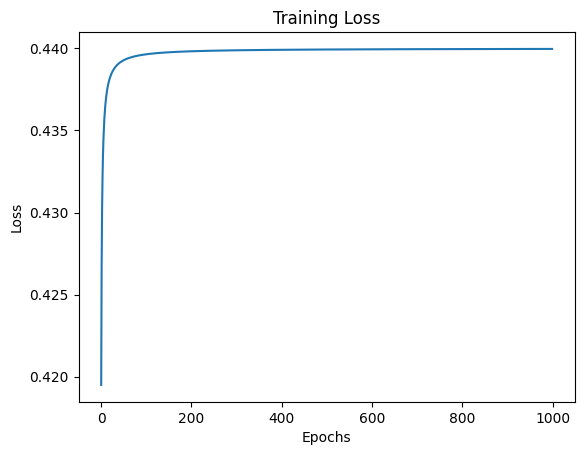

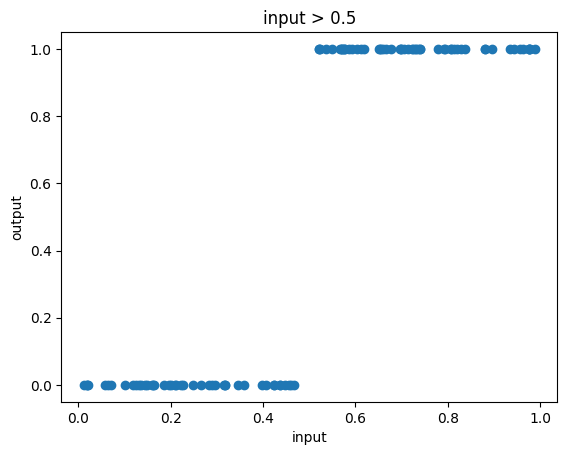

Test inputs: [[0.4 0.6]
 [0.7 0.3]]
Test outputs: [[0.99997843]
 [0.99997569]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

# Sigmoid function
def sigmoid(x: NDArray[np.float64]) -> NDArray[np.float64]:
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x: NDArray[np.float64]) -> NDArray[np.float64]:
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(
        self,
        input_dim: int,
        hidden_dim: int,
        output_dim: int,
    ):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        # Initialize weights randomly
        self.weights1 = np.random.rand(self.input_dim, self.hidden_dim)
        self.weights2 = np.random.rand(self.hidden_dim, self.output_dim)

        # Initialize biases to zero
        self.bias1 = np.zeros((1, self.hidden_dim))
        self.bias2 = np.zeros((1, self.output_dim))

    def forward(self, inputs: NDArray[np.float64]):
        # Forward pass
        self.hidden_layer = sigmoid(np.dot(inputs, self.weights1) + self.bias1)
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2) + self.bias2)
        return self.output_layer

    def backpropagate(
        self,
        inputs: NDArray[np.float64],
        targets: NDArray[np.float64],
        learning_rate: float,
    ):
        # Backward pass
        output_error = targets - self.output_layer
        output_delta = output_error * sigmoid_derivative(self.output_layer)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer)

        # Weight updates
        self.weights2 += learning_rate * self.hidden_layer.T.dot(output_delta)
        self.weights1 += learning_rate * inputs.T.dot(hidden_delta)

        # Bias updates
        self.bias2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.bias1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(
        self,
        inputs: NDArray[np.float64],
        targets: NDArray[np.float64],
        learning_rate: float,
        epochs: int,
    ) -> list[np.float64]:
        losses: list[np.float64] = []
        for _ in range(epochs):
            self.forward(inputs)
            loss: np.float64 = np.mean(np.square(targets - self.output_layer))
            losses.append(loss)
            self.backpropagate(inputs, targets, learning_rate)
        return losses

# Example usage
if __name__ == "__main__":
    # Generate some random data
    np.random.seed(0)
    inputs = np.random.rand(100, 2)
    targets = (inputs[:, 0] > 0.5).astype(int).reshape(-1, 1)

    # Create a neural network
    nn = NeuralNetwork(input_dim=2, hidden_dim=10, output_dim=1)

    # Train the network
    learning_rate = 0.1
    epochs = 1000
    losses = nn.train(inputs, targets, learning_rate, epochs)

    # Plot the losses
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

    # scatter the data
    plt.scatter(inputs[:, 0], targets)
    plt.xlabel("input")
    plt.ylabel("output")
    plt.title("input > 0.5")
    plt.show()

    # Test the network
    test_inputs: NDArray[np.float64] = np.array([[0.4, 0.6], [0.7, 0.3]])

    print(f"Test inputs: {test_inputs}")
    print(f"Test outputs: {nn.forward(test_inputs)}")